In [1]:
# Import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

import acquire, prepare

## 1. Spam Data
### a. Load and preapre the spam data set

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1])
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Get total counts and the proportion of ham vs. spam

labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)

# Renmae the columns
labels.columns = ['n', 'percent']

# Print the labels
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


In [4]:
# Clean the text using helper function
df = prepare.prep_spam_data(df, 'text')

# Take a peak at the cleaned dataset
df.head()

,label,text,stemmed,lemmatized,clean
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goe to usf he live around...,nah i don't think he go to usf he life around ...,nah ' think go usf life around though


In [5]:
# Add a column with list of words
words = [re.sub(r'([^a-z0-9\s]\s.\s)', '', doc).split() for doc in df.clean]

# column will named words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)
df.head()

,label,text,stemmed,lemmatized,clean,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goe to usf he live around...,nah i don't think he go to usf he life around ...,nah ' think go usf life around though,"[nah, ', think, go, usf, life, around, though]"


In [6]:
# To finalize the preparation for exploration:
# 1. Add a feature that is the length of each document
# 2. Build a set of ham_words and spam_words to explore

ham_words = ' '.join(df[df.label == 'ham'].clean)
spam_words = ' '.join(df[df.label == 'spam'].clean)

# Remove any single character

ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)

# Take a look at the spam_words
spam_words[:200]

'free entrywkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcapply 08452810075over18freemsg hey darling3 weekword backlike fun still tb ok xxx std chgs sen'

### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [7]:
# Use nltk to create a column with bigrams

df['bigrams'] = [list(nltk.ngrams(words, 2)) for words in df.words]
df.head()

,label,text,stemmed,lemmatized,clean,words,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[(ok, lar), (lar, joking), (joking, wif), (wif..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[(free, entry), (entry, 2), (2, wkly), (wkly, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]","[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goe to usf he live around...,nah i don't think he go to usf he life around ...,nah ' think go usf life around though,"[nah, ', think, go, usf, life, around, though]","[(nah, '), (', think), (think, go), (go, usf),..."


In [8]:
# Create the top 20 most frequent bigrams for the spam data

spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(20)
spam_bigrams.head()

(please, call)         43
(customer, service)    27
(guaranteed, call)     23
(po, box)              23
(prize, guaranteed)    22
dtype: int64

In [9]:
# Create the top 20 most frequent bigrams for the ham data

ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(20)
ham_bigrams.head()

(let, know)           33
(sorrycall, later)    33
(good, morning)       30
(new, year)           26
(pls, send)           22
dtype: int64

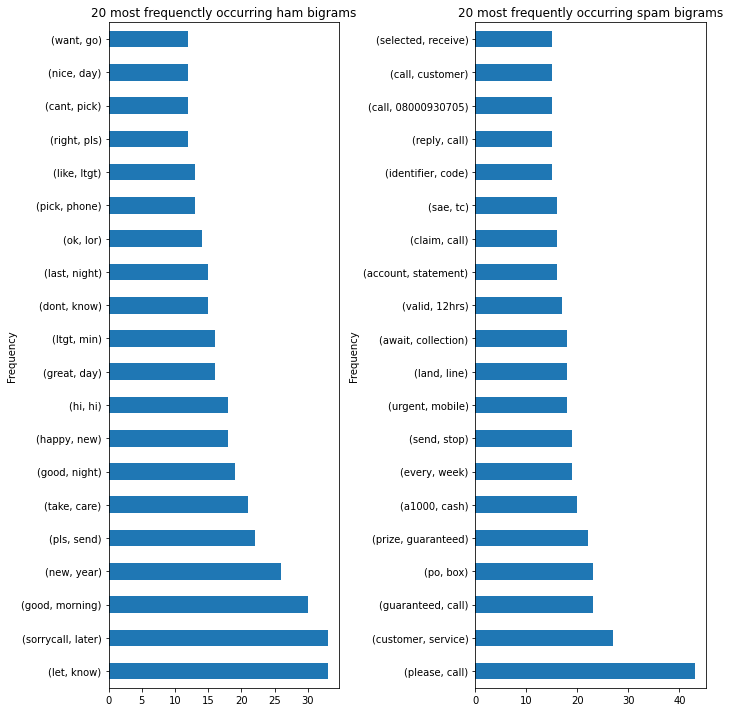

In [10]:
# Visualize the top 20 most frequent bigrams for spam and ham datasets

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

ham_bigrams.plot.barh(ax=ax1, title='20 most frequenctly occurring ham bigrams',
                      xlabel='Frequency', ylabel='Bigram')

spam_bigrams.plot.barh(ax=ax2, title='20 most frequently occurring spam bigrams',
                       xlabel='Frequency', ylabel='Bigram')

plt.tight_layout()
plt.show()

In [11]:
# Convert to dictionary to fit to the 'generate_from_frequencies' method

spam_bigrams_dict = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
ham_bigrams_dict = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}

spam_bigrams_dict

{'please call': 43,
 'customer service': 27,
 'guaranteed call': 23,
 'po box': 23,
 'prize guaranteed': 22,
 'a1000 cash': 20,
 'every week': 19,
 'send stop': 19,
 'urgent mobile': 18,
 'land line': 18,
 'await collection': 18,
 'valid 12hrs': 17,
 'account statement': 16,
 'claim call': 16,
 'sae tc': 16,
 'identifier code': 15,
 'reply call': 15,
 'call 08000930705': 15,
 'call customer': 15,
 'selected receive': 15}

In [12]:
# Create a WordCloud object for the bigrams

img_spam = WordCloud(background_color = 'white', 
                width=800, height=400).generate_from_frequencies(spam_bigrams_dict)

img_ham = WordCloud(background_color = 'white', 
                width=800, height=400).generate_from_frequencies(ham_bigrams_dict)

img_spam

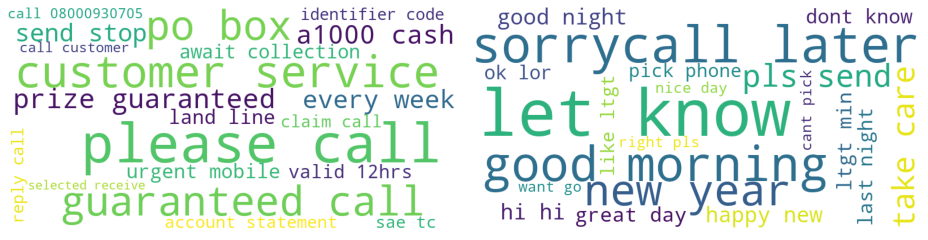

In [13]:
plt.figure(figsize=(13, 13))

plt.subplot(121)
plt.imshow(img_spam)
plt.axis('off')

plt.subplot(122)
plt.imshow(img_ham)
plt.axis('off')

plt.tight_layout()
plt.show()

### c. Is there any overlap in the bigrams for the spam data and the ham data?

In [14]:
# Use set operation to answer the question: no overlap in the top 20 most frequent bigrams. 

set(spam_bigrams.index) & set(ham_bigrams.index)

set()

### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [15]:
# Use nltk to create a column with bigrams

df['trigrams'] = [list(nltk.ngrams(words, 3)) for words in df.words]
df.head()

,label,text,stemmed,lemmatized,clean,words,bigrams,trigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[(go, jurong), (jurong, point), (point, crazy)...","[(go, jurong, point), (jurong, point, crazy), ..."
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[(ok, lar), (lar, joking), (joking, wif), (wif...","[(ok, lar, joking), (lar, joking, wif), (jokin..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[(free, entry), (entry, 2), (2, wkly), (wkly, ...","[(free, entry, 2), (entry, 2, wkly), (2, wkly,..."
3,ham,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]","[(u, dun), (dun, say), (say, early), (early, h...","[(u, dun, say), (dun, say, early), (say, early..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goe to usf he live around...,nah i don't think he go to usf he life around ...,nah ' think go usf life around though,"[nah, ', think, go, usf, life, around, though]","[(nah, '), (', think), (think, go), (go, usf),...","[(nah, ', think), (', think, go), (think, go, ..."


In [16]:
# Create the top 20 most frequent trigrams for the spam and ham data

spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts().head(20)
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts().head(20)

spam_trigrams

(prize, guaranteed, call)              21
(call, customer, service)              15
(land, line, claim)                    14
(2003, account, statement)             13
(private, 2003, account)               13
(reply, call, 08000930705)             13
(camcorder, reply, call)               12
(guaranteed, a1000, cash)              12
(show, 800, unredeemed)                12
(bonus, caller, prize)                 11
(anytime, network, min)                11
(every, week, txt)                     11
(customer, service, representative)    10
(a2000, bonus, caller)                 10
(cash, await, collection)              10
(please, call, customer)               10
(800, unredeemed, point)                9
(trying, contacttoday, draw)            9
(urgent, mobile, number)                9
(a2000, prize, guaranteed)              9
dtype: int64

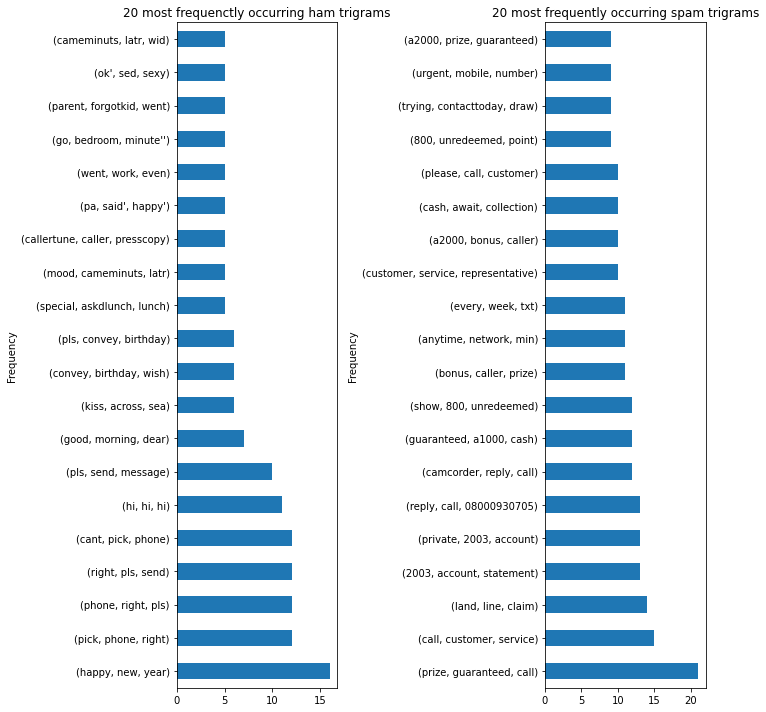

In [17]:
# Visualize the top 20 most frequent trigrams for spam and ham datasets

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

ham_trigrams.plot.barh(ax=ax1, title='20 most frequenctly occurring ham trigrams',
                       xlabel='Frequency', ylabel='Trigram')

spam_trigrams.plot.barh(ax=ax2, title='20 most frequently occurring spam trigrams',
                        xlabel='Frequency', ylabel='Trigram')

plt.tight_layout()
plt.show()

In [18]:
# Convert to dictionary to fit to the 'generate_from_frequencies' method

spam_trigrams_dict = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in spam_trigrams.to_dict().items()}
ham_trigrams_dict = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}

spam_trigrams_dict

{'prize guaranteed call': 21,
 'call customer service': 15,
 'land line claim': 14,
 '2003 account statement': 13,
 'private 2003 account': 13,
 'reply call 08000930705': 13,
 'camcorder reply call': 12,
 'guaranteed a1000 cash': 12,
 'show 800 unredeemed': 12,
 'bonus caller prize': 11,
 'anytime network min': 11,
 'every week txt': 11,
 'customer service representative': 10,
 'a2000 bonus caller': 10,
 'cash await collection': 10,
 'please call customer': 10,
 '800 unredeemed point': 9,
 'trying contacttoday draw': 9,
 'urgent mobile number': 9,
 'a2000 prize guaranteed': 9}

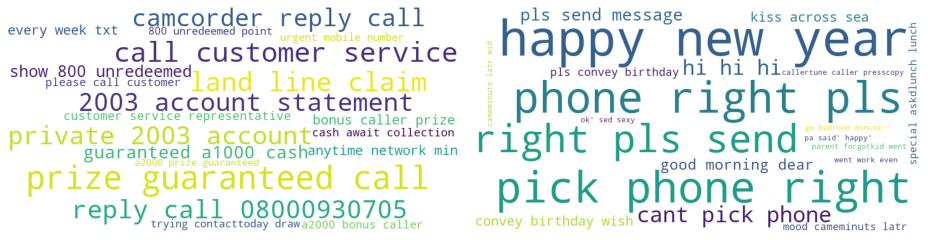

In [19]:
# Create a WordCloud object for the bigrams

img_spam = WordCloud(background_color = 'white', 
                width=800, height=400).generate_from_frequencies(spam_trigrams_dict)

img_ham = WordCloud(background_color = 'white', 
                width=800, height=400).generate_from_frequencies(ham_trigrams_dict)

plt.figure(figsize=(13, 13))

plt.subplot(121)
plt.imshow(img_spam)
plt.axis('off')

plt.subplot(122)
plt.imshow(img_ham)
plt.axis('off')

plt.tight_layout()
plt.show()

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [20]:
# Load the blog articles data using helping function

urls = acquire.get_blog_urls()
df = acquire.acquire_codeup_blogs(urls, cached=False)

In [21]:
# Print the shape
print(df.shape)

# Take a peek at the dataframe
df.head()

(20, 2)


,title,original
0,Build Your Career in Tech: Advice from Alumni!,"Bryan Walsh, Codeup Web Development alum, and ..."
1,What to Expect at Codeup,"Setting Expectations for Life Before, During, ..."
2,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...
3,What is an Employer Influenced Curriculum?,"At Codeup, students get a curriculum that sets..."
4,What Data Science Career is For You?,If you’re struggling to see yourself as a data...


In [22]:
# Clean the dataset using helper function

df = prepare.prep_article_data(df, 'original')
df.head()

,title,original,stemmed,lemmatized,clean
0,Build Your Career in Tech: Advice from Alumni!,"Bryan Walsh, Codeup Web Development alum, and ...",bryan walsh codeup web develop alum and misti ...,bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum misty ...
1,What to Expect at Codeup,"Setting Expectations for Life Before, During, ...",set expect for life befor dure and after codeu...,setting expectation for life before during and...,setting expectation life codeup wondering whet...
2,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...,mani codeup alumni enjoy compet in hackathon a...,many codeup alumnus enjoy competing in hackath...,many codeup alumnus enjoy competing hackathons...
3,What is an Employer Influenced Curriculum?,"At Codeup, students get a curriculum that sets...",at codeup student get a curriculum that set th...,at codeup student get a curriculum that set th...,codeup student get curriculum set success grad...
4,What Data Science Career is For You?,If you’re struggling to see yourself as a data...,if your struggl to see yourself as a data scie...,if youre struggling to see yourself a a data s...,youre struggling see data science professional...


In [23]:
# Print the title
df.title

0        Build Your Career in Tech: Advice from Alumni!
1                              What to Expect at Codeup
2                     Codeup Grads Win CivTech Datathon
3            What is an Employer Influenced Curriculum?
4                  What Data Science Career is For You?
5                   How to Succeed in a Coding Bootcamp
6                                       What is Python?
7                              Codeup Launches Houston!
8     Codeup on Inc. 5000 Fastest Growing Private Co...
9       Alumni Share their Journey into Web Development
10    How Codeup Alumni Helped Dallas Youth Fight CO...
11    What are the Math and Stats Principles You Nee...
12    Announcing: The Annie Easley Scholarship to Su...
13                      Your Education is an Investment
14          How Codeup Alumni are Helping to Make Water
15              Introducing Our Salary Refund Guarantee
16                            What is Machine Learning?
17       What is the Transition into Data Scienc

**Takeaways**
- I am interested in how to succedd in the codeup, so I will focus on title[12].

In [24]:
# Add a column with list of words
words = [re.sub(r'([^a-z0-9\s]\s.\s)', '', doc).split() for doc in df.clean]

# column will named words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)
df.head()

,title,original,stemmed,lemmatized,clean,words
0,Build Your Career in Tech: Advice from Alumni!,"Bryan Walsh, Codeup Web Development alum, and ...",bryan walsh codeup web develop alum and misti ...,bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum misty ...,"[bryan, walsh, codeup, web, development, alum,..."
1,What to Expect at Codeup,"Setting Expectations for Life Before, During, ...",set expect for life befor dure and after codeu...,setting expectation for life before during and...,setting expectation life codeup wondering whet...,"[setting, expectation, life, codeup, wondering..."
2,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...,mani codeup alumni enjoy compet in hackathon a...,many codeup alumnus enjoy competing in hackath...,many codeup alumnus enjoy competing hackathons...,"[many, codeup, alumnus, enjoy, competing, hack..."
3,What is an Employer Influenced Curriculum?,"At Codeup, students get a curriculum that sets...",at codeup student get a curriculum that set th...,at codeup student get a curriculum that set th...,codeup student get curriculum set success grad...,"[codeup, student, get, curriculum, set, succes..."
4,What Data Science Career is For You?,If you’re struggling to see yourself as a data...,if your struggl to see yourself as a data scie...,if youre struggling to see yourself a a data s...,youre struggling see data science professional...,"[youre, struggling, see, data, science, profes..."


In [25]:
# Use nltk to create a column with bigrams

df['bigrams'] = [list(nltk.ngrams(words, 2)) for words in df.words]
df.head()

,title,original,stemmed,lemmatized,clean,words,bigrams
0,Build Your Career in Tech: Advice from Alumni!,"Bryan Walsh, Codeup Web Development alum, and ...",bryan walsh codeup web develop alum and misti ...,bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum misty ...,"[bryan, walsh, codeup, web, development, alum,...","[(bryan, walsh), (walsh, codeup), (codeup, web..."
1,What to Expect at Codeup,"Setting Expectations for Life Before, During, ...",set expect for life befor dure and after codeu...,setting expectation for life before during and...,setting expectation life codeup wondering whet...,"[setting, expectation, life, codeup, wondering...","[(setting, expectation), (expectation, life), ..."
2,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...,mani codeup alumni enjoy compet in hackathon a...,many codeup alumnus enjoy competing in hackath...,many codeup alumnus enjoy competing hackathons...,"[many, codeup, alumnus, enjoy, competing, hack...","[(many, codeup), (codeup, alumnus), (alumnus, ..."
3,What is an Employer Influenced Curriculum?,"At Codeup, students get a curriculum that sets...",at codeup student get a curriculum that set th...,at codeup student get a curriculum that set th...,codeup student get curriculum set success grad...,"[codeup, student, get, curriculum, set, succes...","[(codeup, student), (student, get), (get, curr..."
4,What Data Science Career is For You?,If you’re struggling to see yourself as a data...,if your struggl to see yourself as a data scie...,if youre struggling to see yourself a a data s...,youre struggling see data science professional...,"[youre, struggling, see, data, science, profes...","[(youre, struggling), (struggling, see), (see,..."


In [26]:
# Create the top 20 most frequent words for the 'how to succeed' dataset

advice = pd.Series(list(nltk.ngrams(df.words[12], 1))).value_counts().head(20)
advice.head()

(black,)          12
(scholarship,)    11
(tech,)           10
(technology,)      7
(easley,)          7
dtype: int64

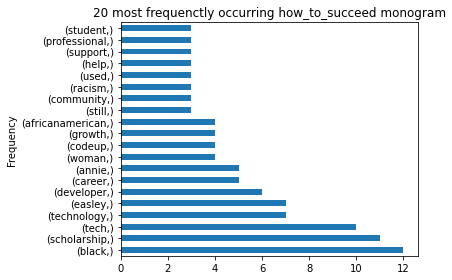

In [27]:
# Visualize the top 20 most frequent bigrams for spam and ham datasets

advice.plot.barh(title='20 most frequenctly occurring how_to_succeed monogram',
                 xlabel='Frequency', ylabel='Monogram')

plt.tight_layout()
plt.show()

In [28]:
# Convert to dictionary to fit to the 'generate_from_frequencies' method

advice_dict = {k[0]: v for k, v in advice.to_dict().items()}
advice_dict

{'black': 12,
 'scholarship': 11,
 'tech': 10,
 'technology': 7,
 'easley': 7,
 'developer': 6,
 'career': 5,
 'annie': 5,
 'woman': 4,
 'codeup': 4,
 'growth': 4,
 'africanamerican': 4,
 'still': 3,
 'community': 3,
 'racism': 3,
 'used': 3,
 'help': 3,
 'support': 3,
 'professional': 3,
 'student': 3}

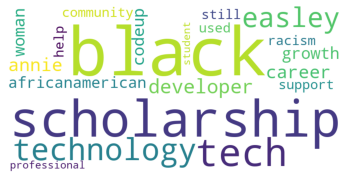

In [29]:
# Create a WordCloud object for the bigrams

img_advice = WordCloud(background_color = 'white', 
                       width=800, height=400).generate_from_frequencies(advice_dict)

plt.imshow(img_advice)
plt.axis('off')
plt.show()

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [30]:
# Load the blog articles data using helping function

df = acquire.get_news_articles(cached=False)
df.head()

,topic,title,author,original
0,business,Bharat Biotech confirms adverse event in COVAX...,Nandini Sinha,Bharat Biotech has confirmed that its potentia...
1,business,"Moderna to charge ₹1,850-₹2,740 per dose for i...",Krishna Veera Vanamali,Moderna will charge governments between $25 an...
2,business,"HDFC Bank's ATMs, digital services down due to...",Rishabh Bhatnagar,Several HDFC Bank customers reported being una...
3,business,RBI becomes world's first central bank to hit ...,Pragya Swastik,"The RBI hit 10 lakh followers-mark on Twitter,..."
4,business,'Zillennials' on track to overtake millennials...,Pragya Swastik,"'Zillennials', 'Gen Z', or the people born bet..."


In [31]:
# Count the uniques in the topic
df.topic.value_counts()

business         25
technology       25
sports           25
entertainment    24
Name: topic, dtype: int64

In [32]:
#  Clean the dataset using helper function

df = prepare.prep_news_data(df, 'original')
df.head()

,topic,title,original,stemmed,lemmatized,clean
0,business,Bharat Biotech confirms adverse event in COVAX...,Bharat Biotech has confirmed that its potentia...,bharat biotech ha confirm that it potenti covi...,bharat biotech ha confirmed that it potential ...,bharat biotech confirmed potential covid19 vac...
1,business,"Moderna to charge ₹1,850-₹2,740 per dose for i...",Moderna will charge governments between $25 an...,moderna will charg govern between 25 and 37 18...,moderna will charge government between 25 and ...,moderna charge government 25 37 1850 2740 per ...
2,business,"HDFC Bank's ATMs, digital services down due to...",Several HDFC Bank customers reported being una...,sever hdfc bank custom report be unabl to with...,several hdfc bank customer reported being unab...,several hdfc bank customer reported unable wit...
3,business,RBI becomes world's first central bank to hit ...,"The RBI hit 10 lakh followers-mark on Twitter,...",the rbi hit 10 lakh followersmark on twitter m...,the rbi hit 10 lakh followersmark on twitter m...,rbi hit 10 lakh followersmark twitter making w...
4,business,'Zillennials' on track to overtake millennials...,"'Zillennials', 'Gen Z', or the people born bet...",'zillennials' 'gen z' or the peopl born betwee...,'zillennials' 'gen z' or the people born betwe...,' zillennials ' ' gen z ' people born 1996 201...


In [33]:
# Add a column with list of words
words = [re.sub(r'([^a-z0-9\s]\s.\s)', '', doc).split() for doc in df.clean]

# column will named words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)
df.head()

,topic,title,original,stemmed,lemmatized,clean,words
0,business,Bharat Biotech confirms adverse event in COVAX...,Bharat Biotech has confirmed that its potentia...,bharat biotech ha confirm that it potenti covi...,bharat biotech ha confirmed that it potential ...,bharat biotech confirmed potential covid19 vac...,"[bharat, biotech, confirmed, potential, covid1..."
1,business,"Moderna to charge ₹1,850-₹2,740 per dose for i...",Moderna will charge governments between $25 an...,moderna will charg govern between 25 and 37 18...,moderna will charge government between 25 and ...,moderna charge government 25 37 1850 2740 per ...,"[moderna, charge, government, 25, 37, 1850, 27..."
2,business,"HDFC Bank's ATMs, digital services down due to...",Several HDFC Bank customers reported being una...,sever hdfc bank custom report be unabl to with...,several hdfc bank customer reported being unab...,several hdfc bank customer reported unable wit...,"[several, hdfc, bank, customer, reported, unab..."
3,business,RBI becomes world's first central bank to hit ...,"The RBI hit 10 lakh followers-mark on Twitter,...",the rbi hit 10 lakh followersmark on twitter m...,the rbi hit 10 lakh followersmark on twitter m...,rbi hit 10 lakh followersmark twitter making w...,"[rbi, hit, 10, lakh, followersmark, twitter, m..."
4,business,'Zillennials' on track to overtake millennials...,"'Zillennials', 'Gen Z', or the people born bet...",'zillennials' 'gen z' or the peopl born betwee...,'zillennials' 'gen z' or the people born betwe...,' zillennials ' ' gen z ' people born 1996 201...,"[', zillennials, gen, z, ', people, born, 1996..."


In [34]:
# Build a set of ham_words and spam_words to explore

busi_words = ' '.join(df[df.topic == 'business'].clean)
tech_words = ' '.join(df[df.topic == 'technology'].clean)
spor_words = ' '.join(df[df.topic == 'sports'].clean)
ente_words = ' '.join(df[df.topic == 'entertainment'].clean)

# Remove any single character

busi_words = re.sub(r'\s.\s', '', busi_words)
tech_words = re.sub(r'\s.\s', '', tech_words)
spor_words = re.sub(r'\s.\s', '', spor_words)
ente_words = re.sub(r'\s.\s', '', ente_words)

# Take a look at the busi_words
busi_words[:200]

'bharat biotech confirmed potential covid19 vaccine covaxin reported adverse event phaseclinical trial august adverse event investigated thoroughly determined vaccinerelated bharat biotech said stateme'

In [40]:
# Create the top 20 most frequent words for each topic

busi_bigrams = pd.Series(list(nltk.ngrams(busi_words.split(), 2))).value_counts().head(20)
tech_bigrams = pd.Series(list(nltk.ngrams(tech_words.split(), 2))).value_counts().head(20)
spor_bigrams = pd.Series(list(nltk.ngrams(spor_words.split(), 2))).value_counts().head(20)
ente_bigrams = pd.Series(list(nltk.ngrams(ente_words.split(), 2))).value_counts().head(20) 

In [41]:
# Convert to dictionary to fit to the 'generate_from_frequencies' method

busi_bigrams_dict = {k[0] + ' ' + k[1]: v for k, v in busi_bigrams.to_dict().items()}
tech_bigrams_dict = {k[0] + ' ' + k[1]: v for k, v in tech_bigrams.to_dict().items()}
spor_bigrams_dict = {k[0] + ' ' + k[1]: v for k, v in spor_bigrams.to_dict().items()}
ente_bigrams_dict = {k[0] + ' ' + k[1]: v for k, v in ente_bigrams.to_dict().items()}

busi_bigrams_dict

{'per litre': 3,
 'covid19 vaccine': 3,
 'verizon medium': 3,
 'adverse event': 3,
 'tax abuse': 2,
 'six entity': 2,
 'avaada mhbuldhana': 2,
 'bharti airtel': 2,
 'bharat biotech': 2,
 'hdfc bank': 2,
 'petrol price': 2,
 'central bank': 2,
 'private sector': 2,
 'karnataka government': 2,
 'solar power': 2,
 'interest rate': 2,
 'billion year': 2,
 'refining capacity': 2,
 'huffington post': 2,
 'cut indusind': 1}

In [42]:
# Create the WordCloud objects for the bigrams

img_busi = WordCloud(background_color = 'white', 
                     width=800, height=400).generate_from_frequencies(busi_bigrams_dict)

img_tech = WordCloud(background_color = 'white', 
                     width=800, height=400).generate_from_frequencies(tech_bigrams_dict)

img_spor = WordCloud(background_color = 'white', 
                     width=800, height=400).generate_from_frequencies(spor_bigrams_dict)

img_ente = WordCloud(background_color = 'white', 
                     width=800, height=400).generate_from_frequencies(ente_bigrams_dict)

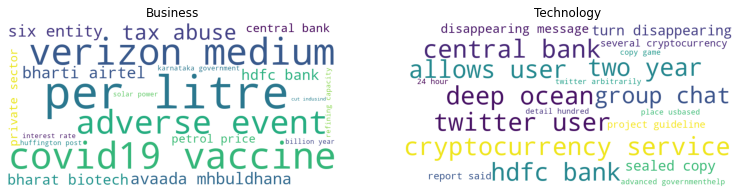

In [47]:
plt.figure(figsize=(13, 13))

plt.subplot(121)
plt.imshow(img_busi)
plt.title('Business')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_tech)
plt.title('Technology')
plt.axis('off')

plt.show()

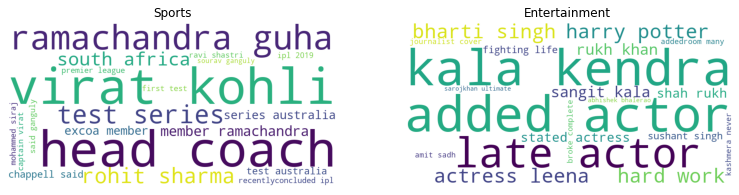

In [48]:
plt.figure(figsize=(13, 13))

plt.subplot(121)
plt.imshow(img_spor)
plt.title('Sports')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_ente)
plt.title('Entertainment')
plt.axis('off')

plt.show()